# Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.



FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel("C:/Users/Narayan/Downloads/Data_Train.xlsx")

In [3]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

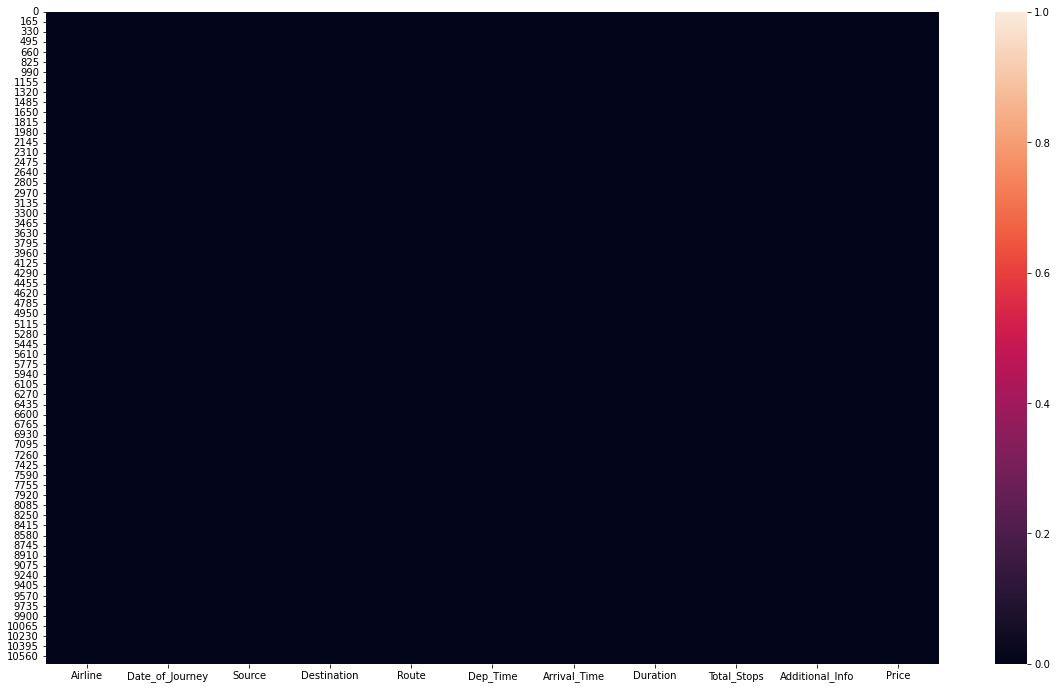

In [6]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train.isnull())

In [7]:
df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

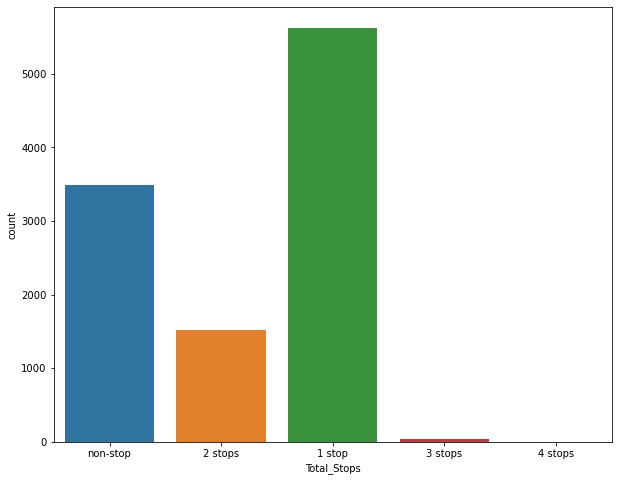

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(df_train['Total_Stops'])
df_train['Total_Stops'].value_counts()

HENCE THERE ARE MAXIMUM 1 STOP FLIGHTS AND ONLY ONE MISSING VALUE SO THAT CAN BE REPLACED BY 1 STOP.

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

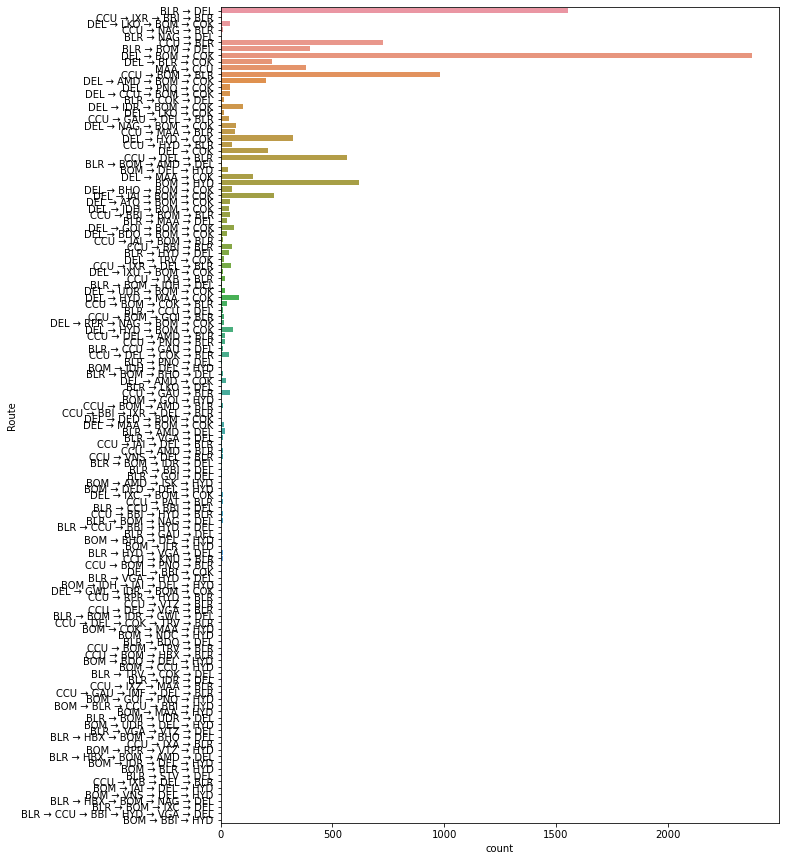

In [9]:
plt.figure(figsize=(10,15))
sns.countplot(data=df_train,y='Route')
df_train['Route'].value_counts()

HENCE ONLY 1 MISSING VALUE SO CAN BE REPLACED BY MAXIMUM ROUTE TAKEN BY FLIGHT, i.e.,DEL → BOM → COK



In [10]:
df_train[df_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
df_train[['Total_Stops']] = df_train[['Total_Stops']].fillna('1 stop')
df_train[['Route']] = df_train[['Route']].fillna('DEL → BOM → COK')
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

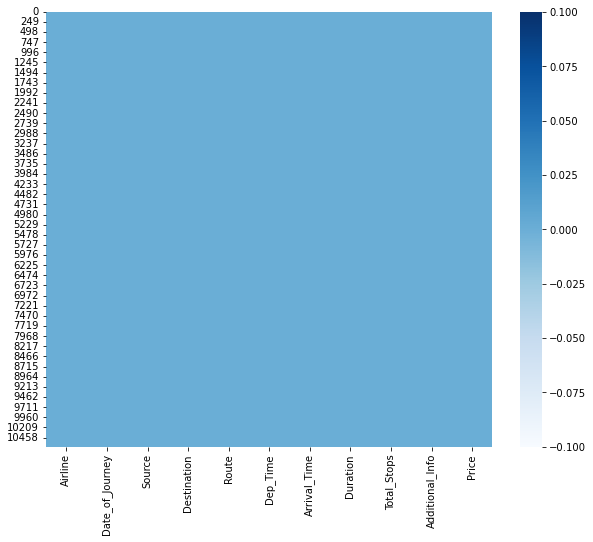

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isnull(),cmap='Blues')

# EDA (EXPLORATORY DATA ANALYSIS)

In [13]:
df_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [14]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
# Change Date_of_Journey into day and month 
# excluding year as year is same 2019 

df_train['J_Day'] = pd.to_datetime(df_train['Date_of_Journey'], format="%d/%m/%Y").dt.day
df_train['J_Month'] = pd.to_datetime(df_train['Date_of_Journey'], format="%d/%m/%Y").dt.month

df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_Day,J_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
# separating hour and minute   

df_train['Arival_Hour'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arival_Minutes'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute
df_train['Dep_Hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Dep_Minutes'] = pd.to_datetime(df_train['Dep_Time']).dt.minute
df_train.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_Day,J_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [18]:
# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [19]:
# Adding duration_hours and duration_mins list to df_train dataframe

df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_Day,J_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [20]:
df_train.drop("Date_of_Journey",axis=1,inplace=True)
df_train.drop("Dep_Time",axis=1,inplace=True)
df_train.drop("Arrival_Time",axis=1,inplace=True)
df_train.drop("Route",axis=1,inplace=True)
df_train.drop("Additional_Info",axis=1,inplace=True)
df_train.drop("Duration",axis=1,inplace=True)

df_train.head()

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,21,35,16,50,4,45


# Data Visualization

<AxesSubplot:xlabel='Arival_Hour', ylabel='Count'>

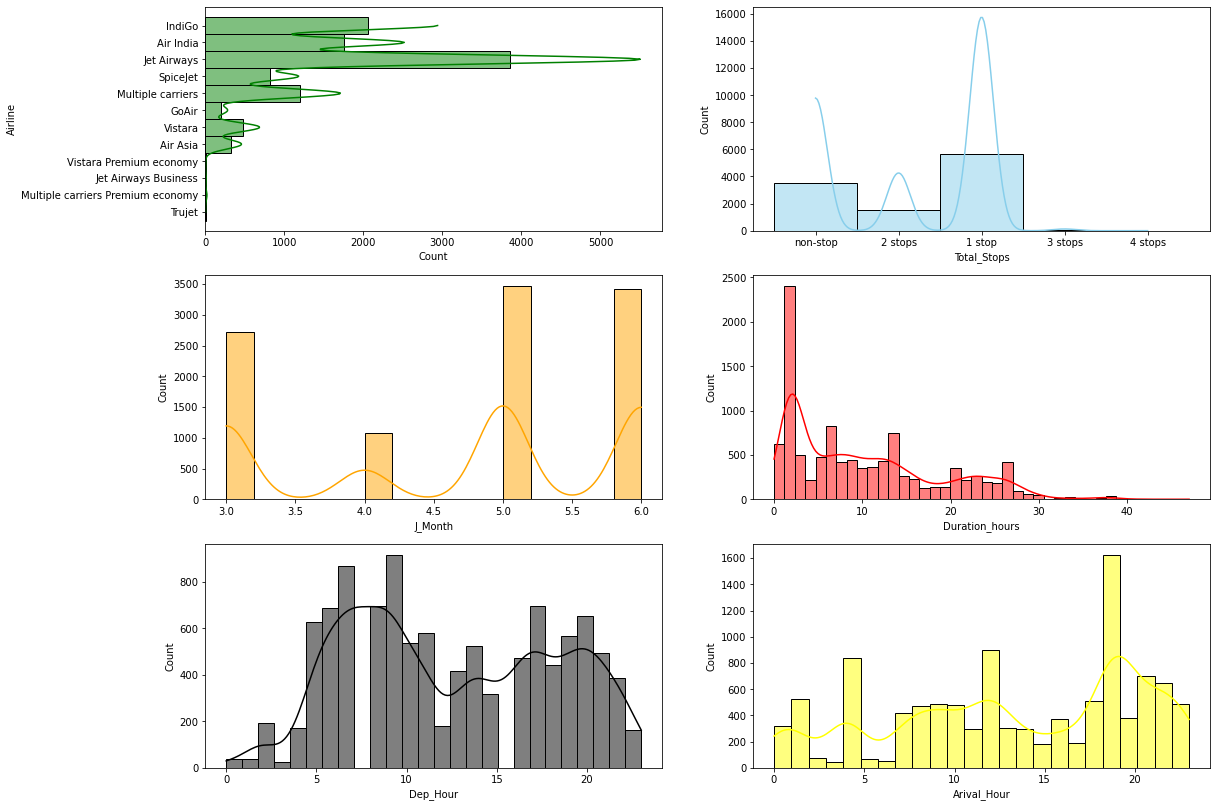

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(18, 14))


sns.histplot(data=df_train, y="Airline", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_train, x="Total_Stops", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df_train, x="J_Month", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df_train, x="Duration_hours", kde=True, ax=axs[1, 1], color='red')
sns.histplot(data=df_train, x="Dep_Hour", kde=True, ax=axs[2, 0], color='black')
sns.histplot(data=df_train, x="Arival_Hour", kde=True, ax=axs[2, 1], color='yellow')

JET AIRWAYS ARE HAVING MORE FLIGHTS COMPARED TO OTHER AND LEAST IS GO AIR

1 STOP FLIGHTS ARE MORE IN NUMBERS

MOST FLIGHT ARE TRAVELLING IN MAY AND JUNE

DURATION TAKEN BY FLIGHTS FOR AROUND 1-2 HOURS ARE MAXIMUM

MOST FLGHTS ARE DAPARTED AT MORNING 5AM TO 10AM

ARRIVAL TIME FOR MOST FLIGHTS ARE 6PM TO 10PM



<AxesSubplot:xlabel='Airline', ylabel='Price'>

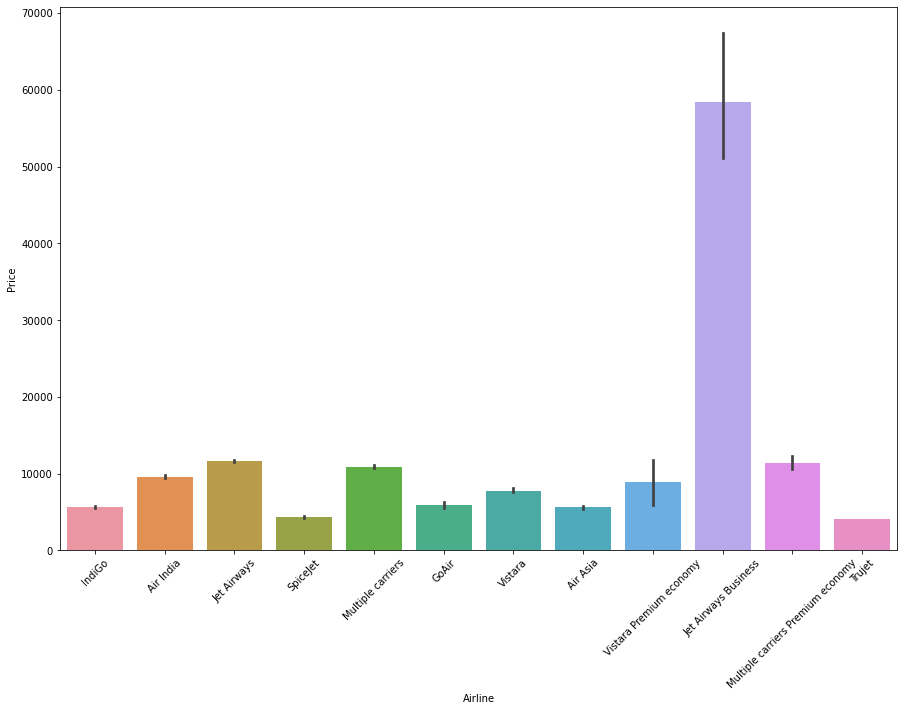

In [22]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.barplot(data=df_train,y='Price',x='Airline')

JET AIRWAYS BUSINESS CLASS ARE HAVING A VERY HIGH PRICE

JETAIRWAYS, IS HAVING HIGH PRICE AMONGST ALL



<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

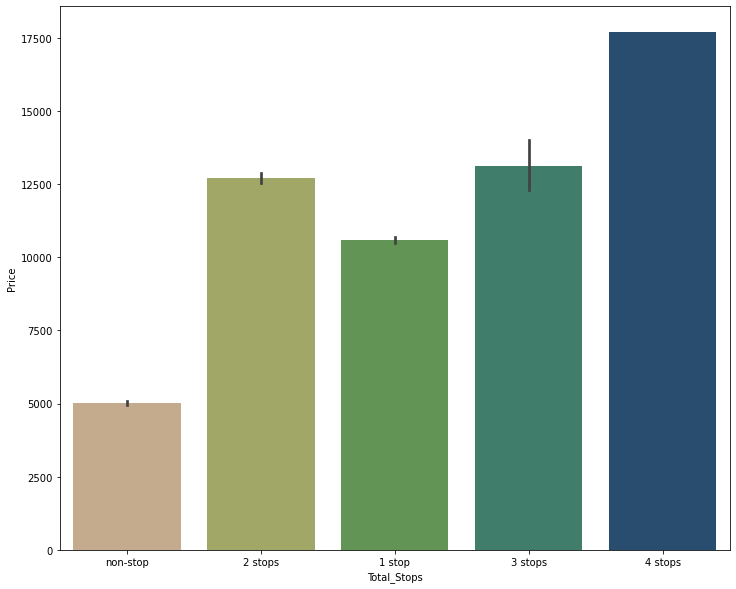

In [23]:
plt.figure(figsize=(12,10))

sns.barplot(data=df_train,y='Price',x='Total_Stops',palette='gist_earth_r')

4 STOPS ARE HAVING PRICE HIGH THAN NON STOP

AS MORE FUEL MORE PRICE AND MORE TRAVEL

<AxesSubplot:xlabel='Duration_hours', ylabel='Price'>

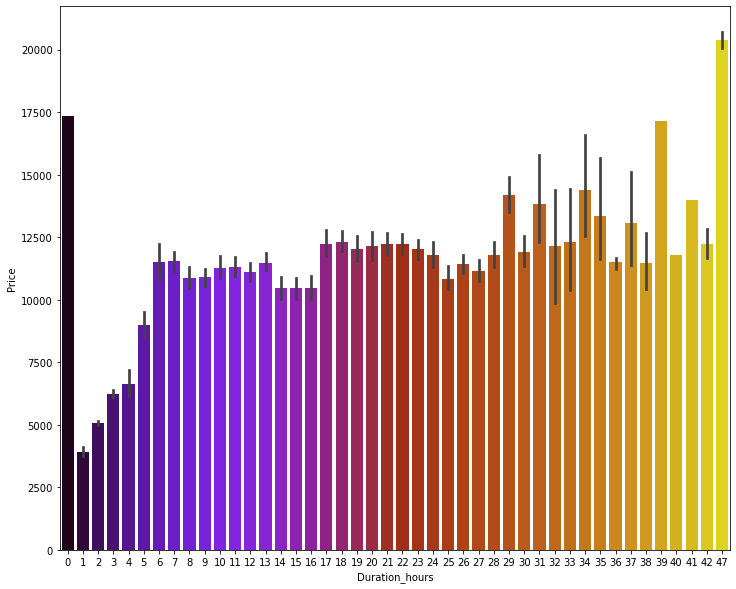

In [24]:
plt.figure(figsize=(12,10))

sns.barplot(data=df_train,y='Price',x='Duration_hours',palette='gnuplot')

HENCE MORE TIME MAY COST MORE PRICE.

HERE 0 IS SHOWING TOTAL MINUTES ONLY TAKEN BY FLGHT SO IGNORE IT

<AxesSubplot:xlabel='Source', ylabel='Price'>

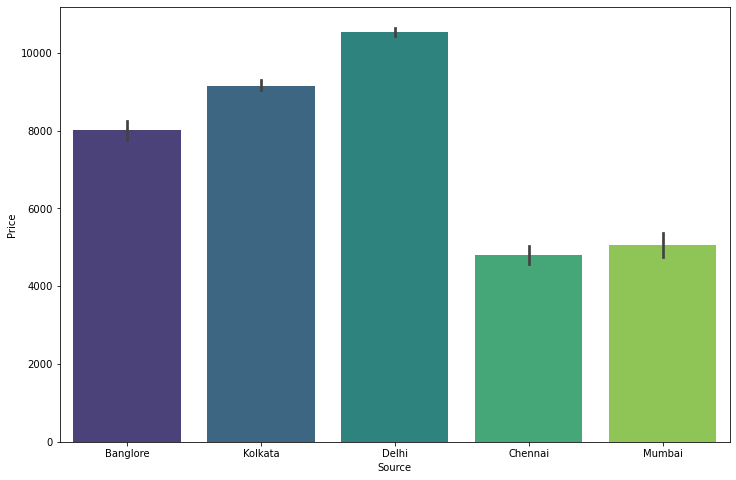

In [25]:
plt.figure(figsize=(12,8))

sns.barplot(data=df_train,y='Price',x='Source',palette='viridis')

DELHI HAS THE HIGHER PRICE THAN ANY OTHER CITY.

IT ALSO DEPENDS ON DESTINATION AND STOPS.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

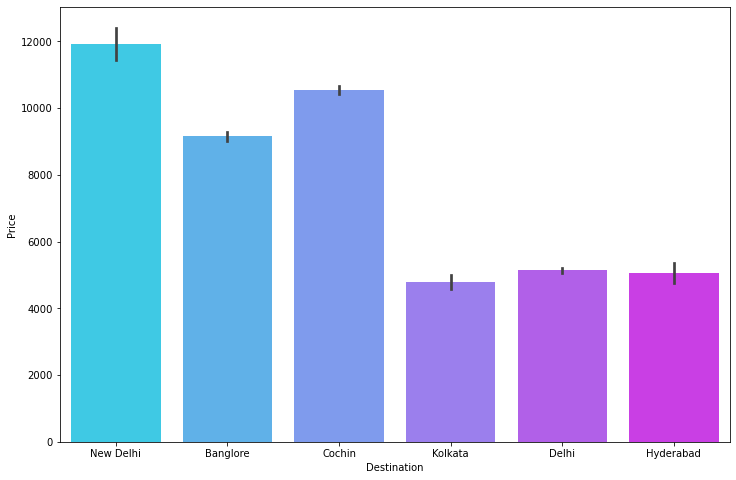

In [26]:
plt.figure(figsize=(12,8))

sns.barplot(data=df_train,y='Price',x='Destination',palette='cool')

NEW DELHI HAS THE HIGHER PRICE FOLLOWED BY COCHIN FOR DESTINATION.

IT DEPENDS ON FREQUENCY AND STOPS

# Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_train['Destination'] = LE.fit_transform(df_train['Destination'])
df_train['Source'] = LE.fit_transform(df_train['Source'])
df_train['Airline'] = LE.fit_transform(df_train['Airline'])
df_train

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
0,3,0,5,non-stop,3897,24,3,1,10,22,20,2,50
1,1,3,0,2 stops,7662,1,5,13,15,5,50,7,25
2,4,2,1,2 stops,13882,9,6,4,25,9,25,19,0
3,3,3,0,1 stop,6218,12,5,23,30,18,5,5,25
4,3,0,5,1 stop,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,non-stop,4107,9,4,22,25,19,55,2,30
10679,1,3,0,non-stop,4145,27,4,23,20,20,45,2,35
10680,4,0,2,non-stop,7229,27,4,11,20,8,20,3,0
10681,10,0,5,non-stop,12648,1,3,14,10,11,30,2,40


In [28]:
# Replacing categorical values with numeric data
df_train.Total_Stops.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4}
                                 ,inplace = True)

In [29]:
df_train

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
0,3,0,5,0,3897,24,3,1,10,22,20,2,50
1,1,3,0,2,7662,1,5,13,15,5,50,7,25
2,4,2,1,2,13882,9,6,4,25,9,25,19,0
3,3,3,0,1,6218,12,5,23,30,18,5,5,25
4,3,0,5,1,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,22,25,19,55,2,30
10679,1,3,0,0,4145,27,4,23,20,20,45,2,35
10680,4,0,2,0,7229,27,4,11,20,8,20,3,0
10681,10,0,5,0,12648,1,3,14,10,11,30,2,40


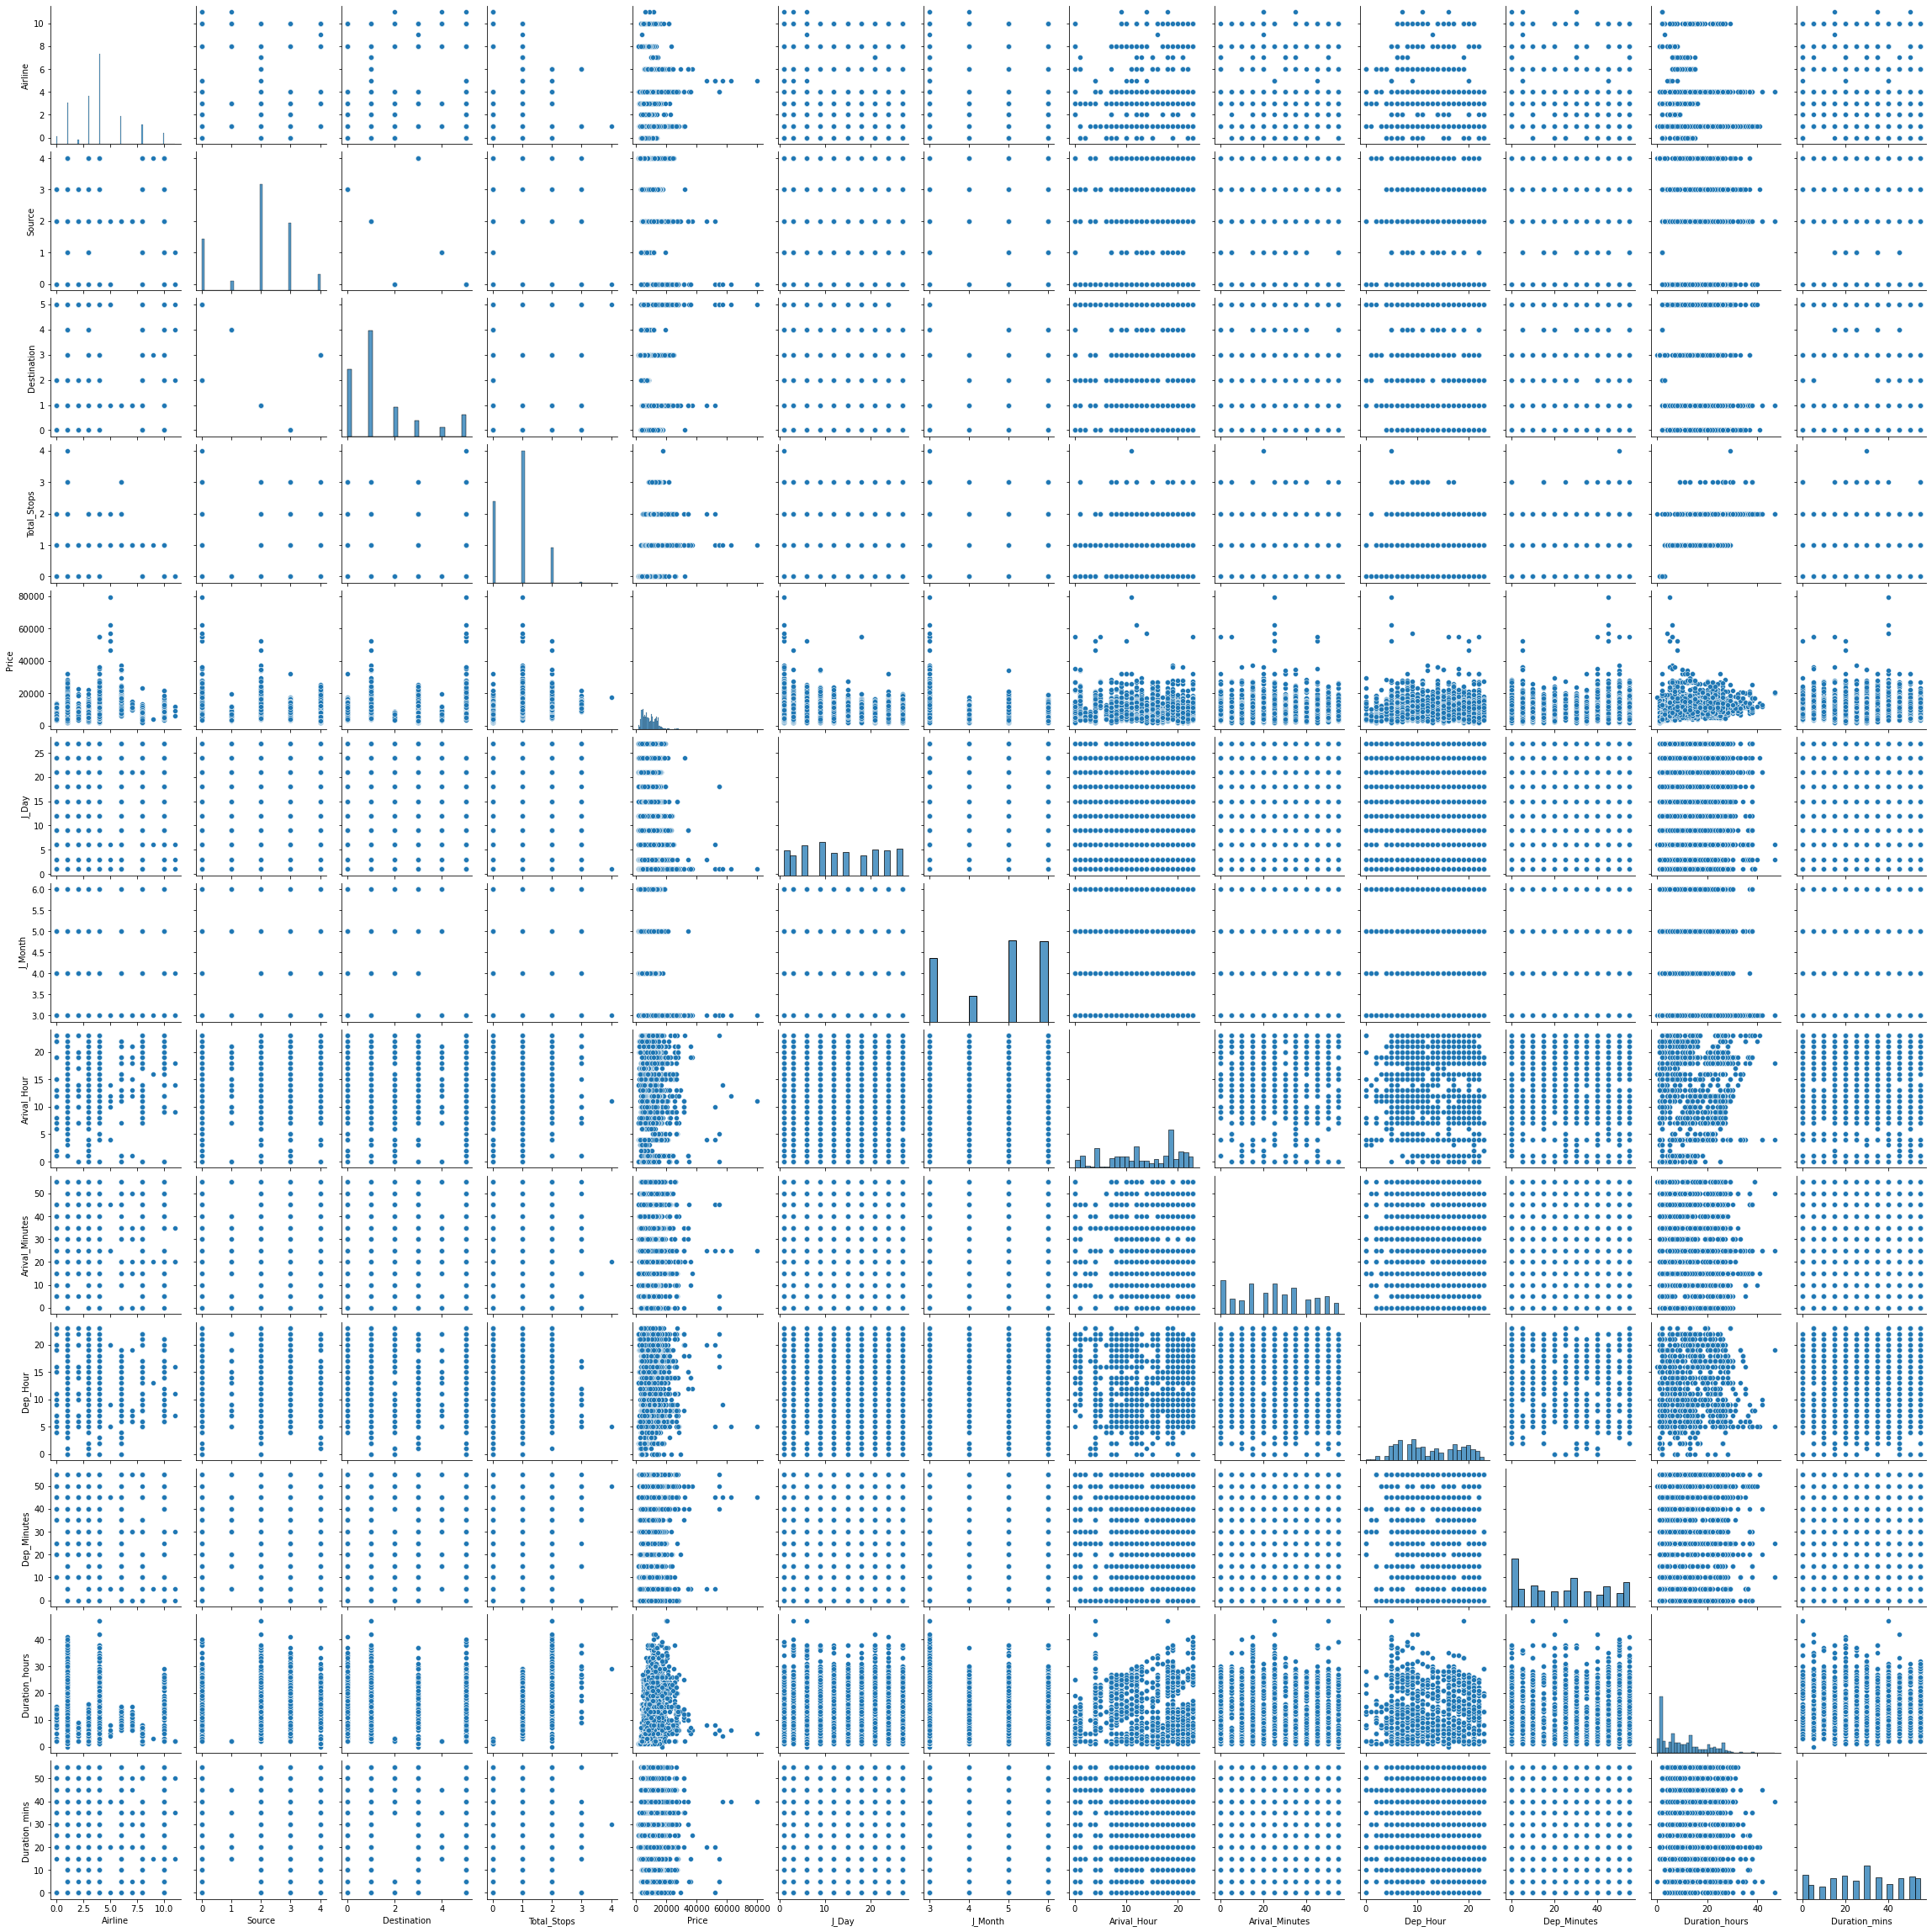

In [30]:
sns.pairplot(df_train)

In [31]:
df_train.describe()

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,0.824207,9087.064121,13.508378,4.708602,13.348778,24.690630,12.490686,24.411214,10.246092,28.327717
std,2.352155,1.177221,1.474782,0.675199,4611.359167,8.479277,1.164357,6.859125,16.506036,5.748650,18.767980,8.495414,16.945400
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,5277.000000,6.000000,3.000000,8.000000,10.000000,8.000000,5.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,1.000000,8372.000000,12.000000,5.000000,14.000000,25.000000,11.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,1.000000,12373.000000,21.000000,6.000000,19.000000,35.000000,18.000000,40.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

The median(50%) is bit greater than mean in Departure_Hour, Departure_Min, Arrival_Hour, Arrival_Hour and Arrival_Min which means these columns are skewed to left.

From the description we can say the minimum price of the flight ticket is Rs.1759.00 and maximum price is Rs.79512.00 also the mean is 9087.

In summarizing the data we can observe that there is huge difference in maximum and 75% percentile in the columns

Price, Duration, etc that means huge outliers present in those columns. These differences can also be seen in many other columns. So we need to remove skewness to get better model and prediction.



<AxesSubplot:>

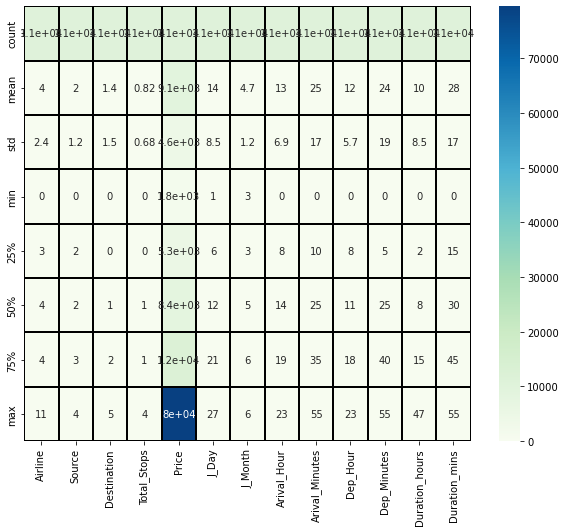

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.describe(),cmap='GnBu',annot=True,linecolor='black',linewidths=0.2)

# Correlation

In [33]:
df_train.corr()

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
Airline,1.000000,-0.013401,0.018479,-0.199411,-0.039520,0.026238,0.024643,-0.007491,-0.071089,-0.035194,-0.060044,-0.158285,-0.028088
Source,-0.013401,1.000000,-0.592574,0.192840,0.015998,0.004898,0.183268,0.025632,0.021040,0.059044,-0.056991,0.166109,-0.145187
Destination,0.018479,-0.592574,1.000000,-0.295481,-0.071112,-0.040998,-0.364686,-0.039710,0.017196,-0.072979,0.127892,-0.258459,0.061214
Total_Stops,-0.199411,0.192840,-0.295481,1.000000,0.603883,-0.009472,0.054389,0.038123,-0.106939,-0.061490,-0.002591,0.739872,-0.136686
Price,-0.039520,0.015998,-0.071112,0.603883,1.000000,-0.153738,-0.103651,0.024264,-0.086155,0.006819,-0.024492,0.508672,-0.124874
J_Day,0.026238,0.004898,-0.040998,-0.009472,-0.153738,1.000000,-0.038378,-0.003192,-0.017511,0.002220,-0.008261,-0.022181,-0.008996
J_Month,0.024643,0.183268,-0.364686,0.054389,-0.103651,-0.038378,1.000000,-0.003941,-0.100626,0.039112,-0.059238,0.016175,-0.040880
Arival_Hour,-0.007491,0.025632,-0.039710,0.038123,0.024264,-0.003192,-0.003941,1.000000,-0.154362,0.005215,0.043054,0.055180,-0.118345
Arival_Minutes,-0.071089,0.021040,0.017196,-0.106939,-0.086155,-0.017511,-0.100626,-0.154362,1.000000,0.067909,-0.017594,-0.074439,0.151626
Dep_Hour,-0.035194,0.059044,-0.072979,-0.061490,0.006819,0.002220,0.039112,0.005215,0.067909,1.000000,-0.024806,0.002783,-0.023746


<AxesSubplot:>

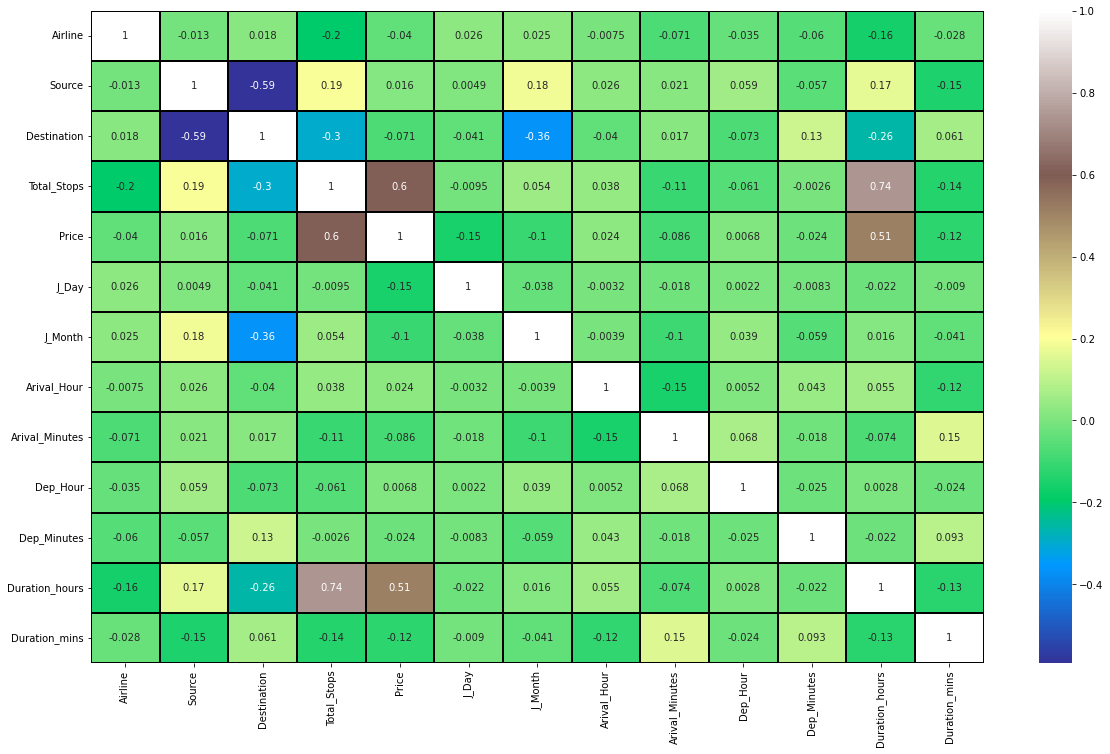

In [34]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(),annot=True,linecolor='black',linewidths=0.2,cmap='terrain')

This heat map contains both positive and negative correlation

PRICE AND TOTAL STOPS ARE HIGHLY CORRELATED.

PRICE AND DURATION HOURS ARE ALSO HIGHLY CORRELATED.

DESTINATION AND SOURCE ARE INVERSLY PROPOTIONAL.

plt.figure(figsize=(22,7)) df_train.corr()['Price'].sort_values(ascending=False).plot(kind='bar',color='c') plt.xlabel('feature',fontsize=14) plt.title('correlation',fontsize=18) plt.show()

except total station and duration hours are showing high positive correlation

arrival hour source and dep are also showing positve correlation

all other columns are negatively correlated



# CHECKING OUTLIERS

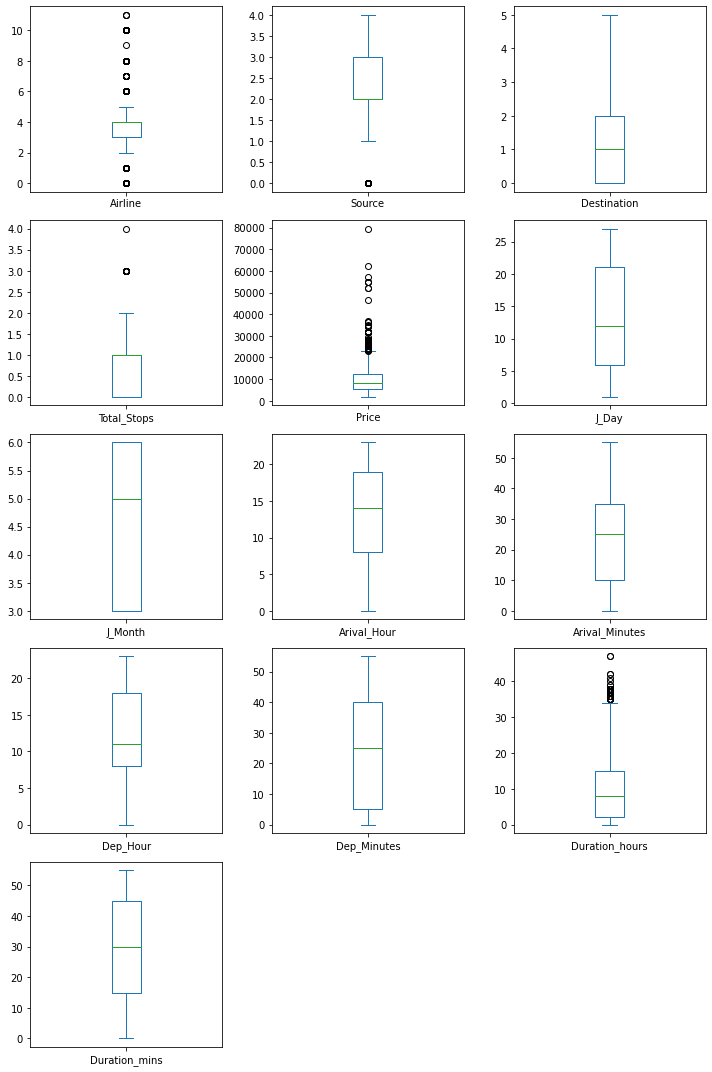

In [35]:
df_train.plot(kind='box',subplots=True,layout=(5,3),figsize=(10,15))
plt.tight_layout()

duration hours,total stops,price, source and airline are having outliers

since price is target vairable and other having outliers are categorical variables

so no need of removing outliers

# SELECTING EATURE AND LABEL

In [36]:
#independent column
x=df_train.drop(['Price'],axis=1)
#target
y=df_train['Price']

In [37]:
x.shape

(10683, 12)

In [38]:
y.shape

(10683,)

# CHECKING SKEWNESS

In [39]:
df_train.skew()

Airline           0.731095
Source           -0.424054
Destination       1.244169
Total_Stops       0.317049
Price             1.812552
J_Day             0.118351
J_Month          -0.387493
Arival_Hour      -0.369988
Arival_Minutes    0.110945
Dep_Hour          0.113073
Dep_Minutes       0.167029
Duration_hours    0.850862
Duration_mins    -0.090841
dtype: float64

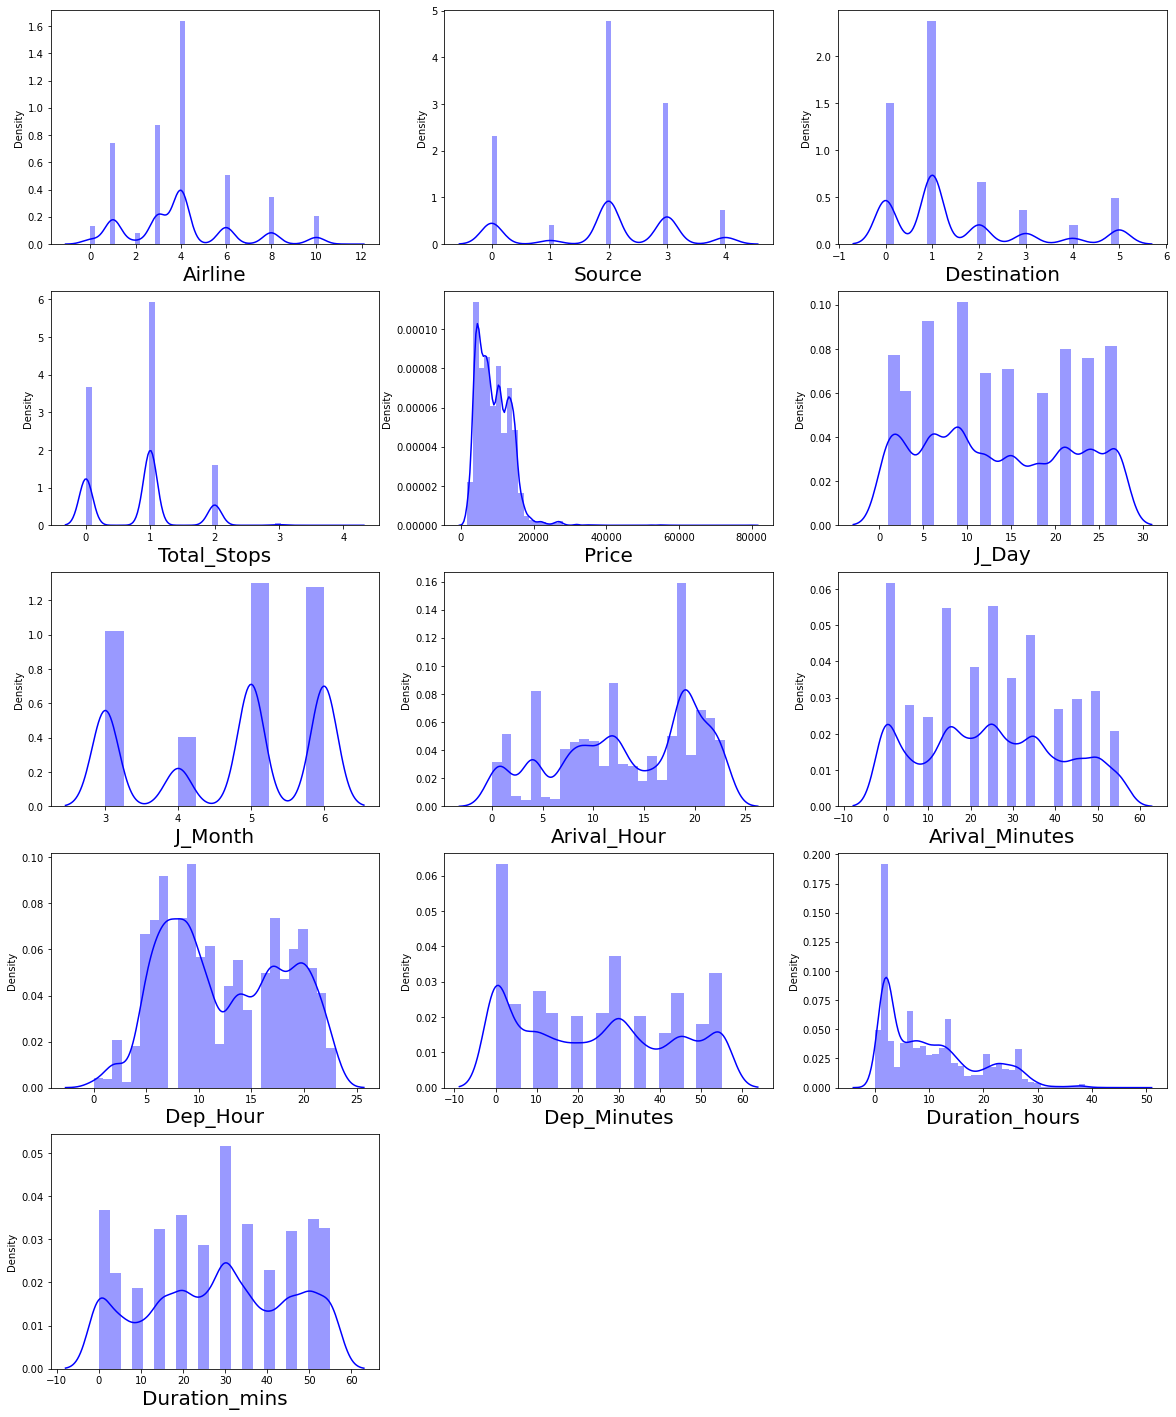

In [40]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df_train.columns:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df_train[column],color='blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

our target variable is having skewness

duration is also showing skewness

In [41]:
from sklearn.preprocessing import power_transform

df_train['Price']=power_transform(df_train,method='yeo-johnson')
df_train['Duration_hours']=power_transform(df_train,method='yeo-johnson')

df_train.head()

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
0,3,0,5,0,-0.295500,24,3,1,10,22,20,-0.295500,50
1,1,3,0,2,-1.420300,1,5,13,15,5,50,-1.420300,25
2,4,2,1,2,0.147745,9,6,4,25,9,25,0.147745,0
3,3,3,0,1,-0.295500,12,5,23,30,18,5,-0.295500,25
4,3,0,5,1,-0.295500,1,3,21,35,16,50,-0.295500,45


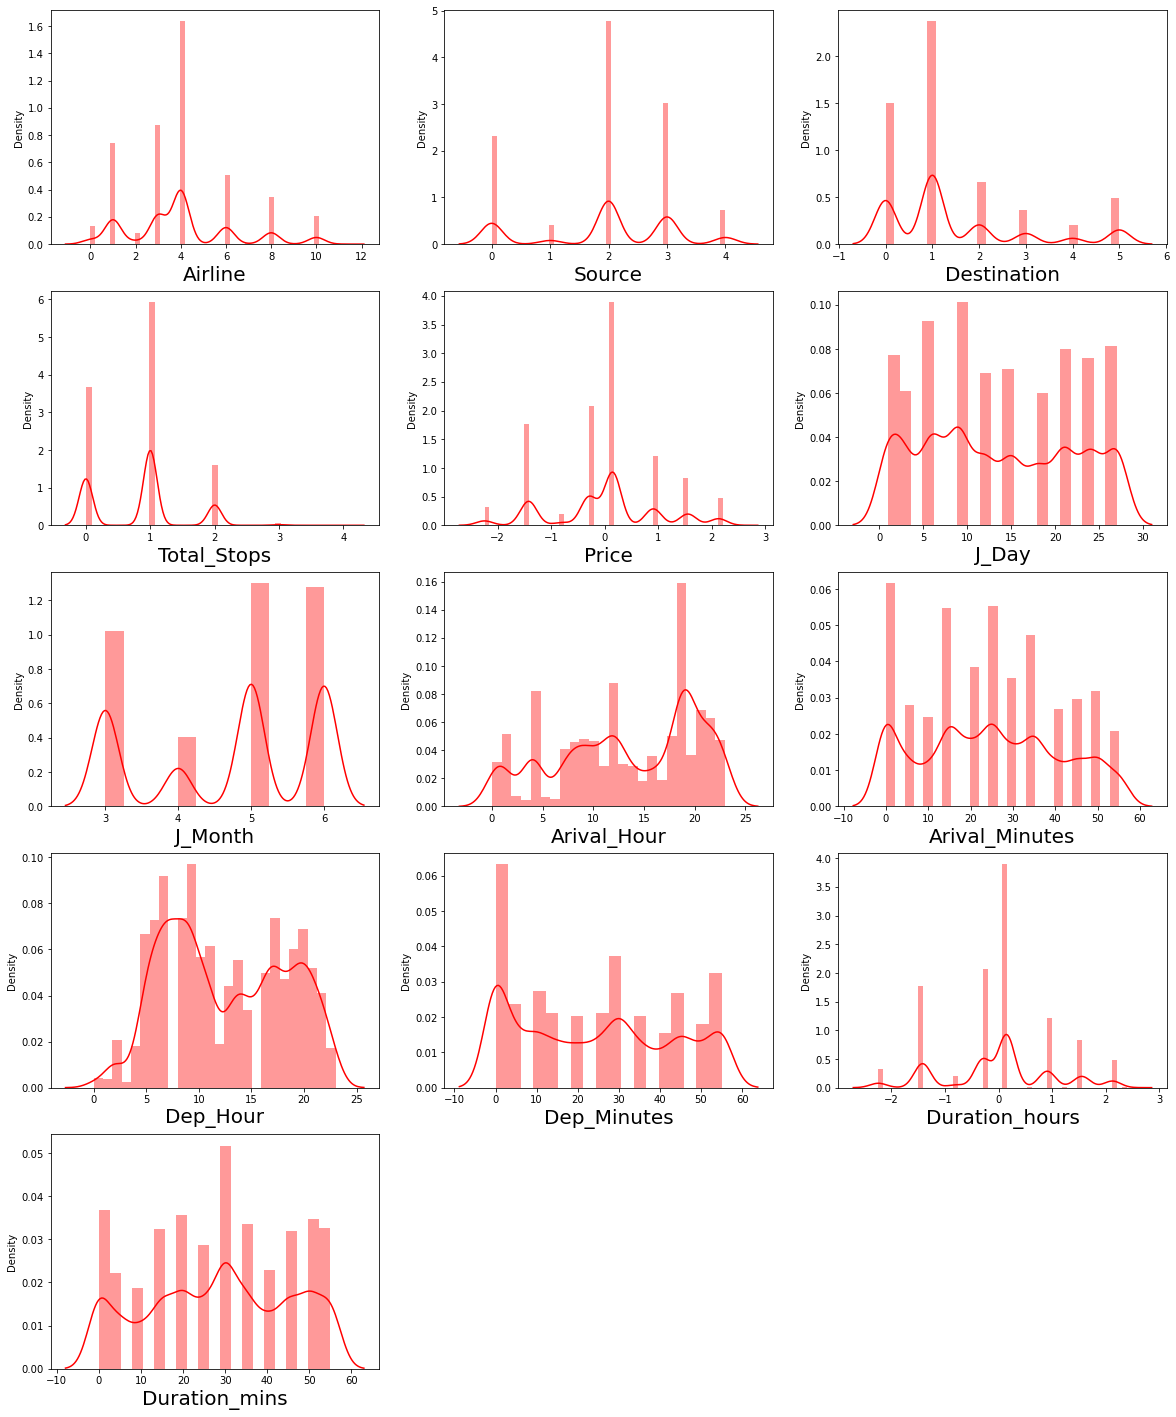

In [42]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df_train.columns:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df_train[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Airline,Source,Destination,Total_Stops,J_Day,J_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
0,-0.410675,-1.658441,2.416665,-1.220744,1.237383,-1.467490,-1.800427,-0.890057,1.654259,-0.235050,-0.970698,1.279008
1,-1.260999,0.890052,-0.973826,1.741483,-1.475239,0.250276,-0.050851,-0.587124,-1.303095,1.363492,-0.382117,-0.196388
2,0.014486,0.040555,-0.295728,1.741483,-0.531719,1.109160,-1.363033,0.018744,-0.607247,0.031373,1.030476,-1.671784
3,-0.410675,0.890052,-0.973826,0.260370,-0.177898,0.250276,1.407129,0.321677,0.958411,-1.034321,-0.617549,-0.196388
4,-0.410675,-1.658441,2.416665,0.260370,-1.475239,-1.467490,1.115533,0.624611,0.610487,1.363492,-0.735265,0.983929


We have scaled the data using StandardScaler method to overcome with the issue of data biasness and displayed the data of independent variables after scaling.

# Splitting the DataFrame

TRAIN_TEST_SPLIT

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=124)

# Model Building

# 1) LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)


print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))


# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

Score:  0.4361766433221671
r2 score:  0.43795312940479136
Mean absolute error: 2448.255666616312
Mean squared error: 12033916.868327973
Root mean squared error: 3468.993639130515


Cross Validation

In [46]:
# LINEAR REGRESSION


test_accuracy= r2_score(y_test,predlr)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 43.46416017220384 and Accuracy score is 43.795312940479135
At cross fold 3 the Cross Val score is 43.489720890162104 and Accuracy score is 43.795312940479135
At cross fold 4 the Cross Val score is 43.48087271839175 and Accuracy score is 43.795312940479135
At cross fold 5 the Cross Val score is 43.524797592870044 and Accuracy score is 43.795312940479135
At cross fold 6 the Cross Val score is 43.707884904379384 and Accuracy score is 43.795312940479135
At cross fold 7 the Cross Val score is 43.71557677471531 and Accuracy score is 43.795312940479135
At cross fold 8 the Cross Val score is 43.633896878067716 and Accuracy score is 43.795312940479135
At cross fold 9 the Cross Val score is 43.83708611387745 and Accuracy score is 43.795312940479135


# 2) DecisionTreeRegressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
dtc_pred=dtc.predict(x_test)


print('score : ',dtc.score(x_train,y_train))
print('r2 score : ',r2_score(y_test,dtc_pred))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,dtc_pred))
print('Mean squared error:', mean_squared_error(y_test,dtc_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,dtc_pred)))

score :  0.970774823440251
r2 score :  0.703041056797705
Mean absolute error: 1338.2842620161632
Mean squared error: 6358151.646709674
Root mean squared error: 2521.537556077576


Cross Validation

In [48]:
# DESICION TREE

test_accuracy= r2_score(y_test,dtc_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 66.78292477614933 and Accuracy score is 70.3041056797705
At cross fold 3 the Cross Val score is 69.19590539923061 and Accuracy score is 70.3041056797705
At cross fold 4 the Cross Val score is 70.2717579851506 and Accuracy score is 70.3041056797705
At cross fold 5 the Cross Val score is 69.70636185595286 and Accuracy score is 70.3041056797705
At cross fold 6 the Cross Val score is 68.32869685146386 and Accuracy score is 70.3041056797705
At cross fold 7 the Cross Val score is 70.12896490402795 and Accuracy score is 70.3041056797705
At cross fold 8 the Cross Val score is 71.04395599508516 and Accuracy score is 70.3041056797705
At cross fold 9 the Cross Val score is 69.58155084088105 and Accuracy score is 70.3041056797705


# 3) RandomForestRegressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Score: ',rf.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrf))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))

Score:  0.9509378753627176
r2 score:  0.8444112609380366
Mean absolute error: 1125.9317817431045
Mean squared error: 3331291.480258269
Root mean squared error: 1825.1825881972106


Cross Validation

In [50]:
# RANDOM FOREST REGRESSOR
test_accuracy= r2_score(y_test,predrf)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=i,n_jobs=5)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")
    

At cross fold 2 the Cross Val score is 78.81515394028679 and Accuracy score is 84.44112609380366
At cross fold 3 the Cross Val score is 78.79356396046146 and Accuracy score is 84.44112609380366
At cross fold 4 the Cross Val score is 79.83521921166862 and Accuracy score is 84.44112609380366
At cross fold 5 the Cross Val score is 80.66979501702664 and Accuracy score is 84.44112609380366
At cross fold 6 the Cross Val score is 80.09911365311332 and Accuracy score is 84.44112609380366
At cross fold 7 the Cross Val score is 80.07987058552722 and Accuracy score is 84.44112609380366
At cross fold 8 the Cross Val score is 80.42015457930162 and Accuracy score is 84.44112609380366
At cross fold 9 the Cross Val score is 80.57029245212604 and Accuracy score is 84.44112609380366


# 4) GradientBoostingRegressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr= gbr.predict(x_test)
print('Score: ',gbr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predgbr))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predgbr))
print('Mean squared error:', mean_squared_error(y_test,predgbr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predgbr)))

Score:  0.7720961195717981
r2 score:  0.8099132238848455
Mean absolute error: 1463.5655272128427
Mean squared error: 4069924.736198221
Root mean squared error: 2017.4054466562295


Cross Validation

In [52]:
# GradientBoostingRegressor
test_accuracy= r2_score(y_test,predgbr)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(gbr,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 76.58135554736475 and Accuracy score is 80.99132238848455
At cross fold 3 the Cross Val score is 76.90215275841472 and Accuracy score is 80.99132238848455
At cross fold 4 the Cross Val score is 76.97369093745603 and Accuracy score is 80.99132238848455
At cross fold 5 the Cross Val score is 77.0447593634746 and Accuracy score is 80.99132238848455
At cross fold 6 the Cross Val score is 76.89540549744223 and Accuracy score is 80.99132238848455
At cross fold 7 the Cross Val score is 76.99709030544383 and Accuracy score is 80.99132238848455
At cross fold 8 the Cross Val score is 77.12016872813503 and Accuracy score is 80.99132238848455
At cross fold 9 the Cross Val score is 76.87275311078211 and Accuracy score is 80.99132238848455


# 5) KNeighborsRegressor

In [53]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor


knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn= knn.predict(x_test)
print('Score: ',knn.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predknn))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predknn))
print('Mean squared error:', mean_squared_error(y_test,predknn))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predknn)))

Score:  0.8138756447703366
r2 score:  0.7421351551517397
Mean absolute error: 1449.5455550829433
Mean squared error: 5521112.683862186
Root mean squared error: 2349.704807813566


Cross Validation

In [54]:
#KNeighborsREGRESSOR
test_accuracy= r2_score(y_test,predknn)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 68.49867317894325 and Accuracy score is 74.21351551517397
At cross fold 3 the Cross Val score is 69.7478559367134 and Accuracy score is 74.21351551517397
At cross fold 4 the Cross Val score is 71.53379553028955 and Accuracy score is 74.21351551517397
At cross fold 5 the Cross Val score is 72.02772681161832 and Accuracy score is 74.21351551517397
At cross fold 6 the Cross Val score is 72.39416843962681 and Accuracy score is 74.21351551517397
At cross fold 7 the Cross Val score is 72.68395987468611 and Accuracy score is 74.21351551517397
At cross fold 8 the Cross Val score is 72.8182883440644 and Accuracy score is 74.21351551517397
At cross fold 9 the Cross Val score is 72.70099789913623 and Accuracy score is 74.21351551517397


# 6) ExtraTreesRegressor

In [55]:
from sklearn.ensemble import ExtraTreesRegressor

ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR=ETR.predict(x_test)
print('Score: ',ETR.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred_ETR))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,pred_ETR))
print('Mean squared error:', mean_squared_error(y_test,pred_ETR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_ETR)))

Score:  0.9707742861860492
r2 score:  0.81537832083422
Mean absolute error: 1185.1028840918757
Mean squared error: 3952912.213209739
Root mean squared error: 1988.193203189705


Cross Validation

In [56]:
# EXTRA TRESS REGRESSOR

test_accuracy= r2_score(y_test,pred_ETR)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ETR,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 78.51121425200584 and Accuracy score is 81.537832083422
At cross fold 3 the Cross Val score is 77.6856322849021 and Accuracy score is 81.537832083422
At cross fold 4 the Cross Val score is 78.02257784233531 and Accuracy score is 81.537832083422
At cross fold 5 the Cross Val score is 78.65791898727052 and Accuracy score is 81.537832083422
At cross fold 6 the Cross Val score is 78.37652552066093 and Accuracy score is 81.537832083422
At cross fold 7 the Cross Val score is 78.09077812113573 and Accuracy score is 81.537832083422
At cross fold 8 the Cross Val score is 77.83166233053747 and Accuracy score is 81.537832083422
At cross fold 9 the Cross Val score is 77.87068491045252 and Accuracy score is 81.537832083422


LinearRegression and decision tree regression are best fitting model but accuracy score is low

So RANDOMFOREST and ExtraTreesRegressor is showing the best result

# Best Fit Line

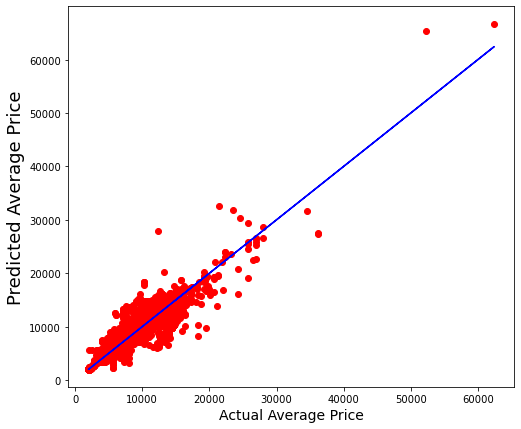

In [57]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= pred_ETR, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Average Price', fontsize= 14 )
plt.ylabel('Predicted Average Price', fontsize= 18)
plt.show()

Final submission is done at end of this notebook.

# Importing Test Dataset

In [58]:
df_test=pd.read_excel("C:/Users/Narayan/Downloads/Test_set.xlsx")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [59]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [61]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<AxesSubplot:>

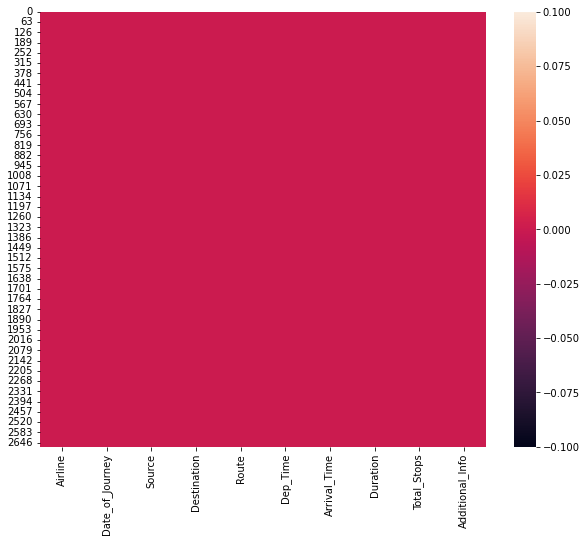

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(df_test.isnull())

NO NULL VALUES

In [63]:
df_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [64]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [65]:
df_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [66]:
df_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [67]:
df_test['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: Duration, Length: 320, dtype: int64

In [68]:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [69]:
# Change Date_of_Journey into day and month 
# excluding year as year is same 2019 

df_test['Jo_Day'] = pd.to_datetime(df_test['Date_of_Journey'], format="%d/%m/%Y").dt.day
df_test['Jo_Month'] = pd.to_datetime(df_test['Date_of_Journey'], format="%d/%m/%Y").dt.month

# separating hour and minute   

df_test['Arival_Hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arival_Minutes'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test['Dep_Hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_Minutes'] = pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Jo_Day,Jo_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2,45,23,55


In [70]:
# Assigning and converting Duration column into list
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
    
# Adding duration_hours and duration_mins list to df_train dataframe

df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins

df_test.head()    

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Jo_Day,Jo_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,4,25,17,30,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,10,20,6,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,21,0,8,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2,45,23,55,2,50


additional info is having majorly no info so dropping it

route has same meaning as source and destination

In [71]:
df_test.drop("Date_of_Journey",axis=1,inplace=True)
df_test.drop("Dep_Time",axis=1,inplace=True)
df_test.drop("Arrival_Time",axis=1,inplace=True)
df_test.drop("Route",axis=1,inplace=True)
df_test.drop("Additional_Info",axis=1,inplace=True)
df_test.drop("Duration",axis=1,inplace=True)

df_test.head()

,Airline,Source,Destination,Total_Stops,Jo_Day,Jo_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,2,45,23,55,2,50


# Label Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_test['Destination'] = LE.fit_transform(df_test['Destination'])
df_test['Source'] = LE.fit_transform(df_test['Source'])
df_test['Airline'] = LE.fit_transform(df_test['Airline'])
df_test


# Replacing categorical values with numeric data
df_test.Total_Stops.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4}
                                 ,inplace = True)


In [73]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Jo_Day,Jo_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
0,4,2,1,1,6,6,4,25,17,30,10,55
1,3,3,0,1,12,5,10,20,6,20,4,0
2,4,2,1,1,21,5,19,0,19,15,23,45
3,6,2,1,1,21,5,21,0,8,0,13,0
4,0,0,2,0,24,6,2,45,23,55,2,50


# Checking Outliers

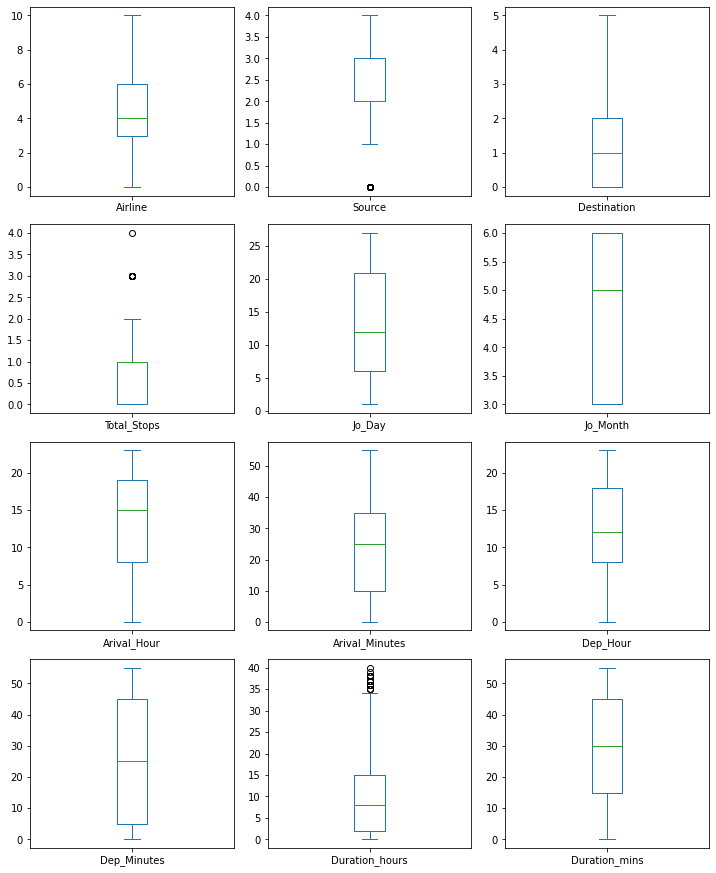

In [74]:
df_test.plot(kind='box',subplots=True,layout=(5,3),figsize=(10,15))
plt.tight_layout()

NO Outliers

# Skewness check

In [75]:
df_test.skew()

Airline           0.483882
Source           -0.424997
Destination       1.263630
Total_Stops       0.321364
Jo_Day            0.199540
Jo_Month         -0.403700
Arival_Hour      -0.443166
Arival_Minutes    0.115267
Dep_Hour          0.093759
Dep_Minutes       0.128515
Duration_hours    0.884647
Duration_mins    -0.104482
dtype: float64

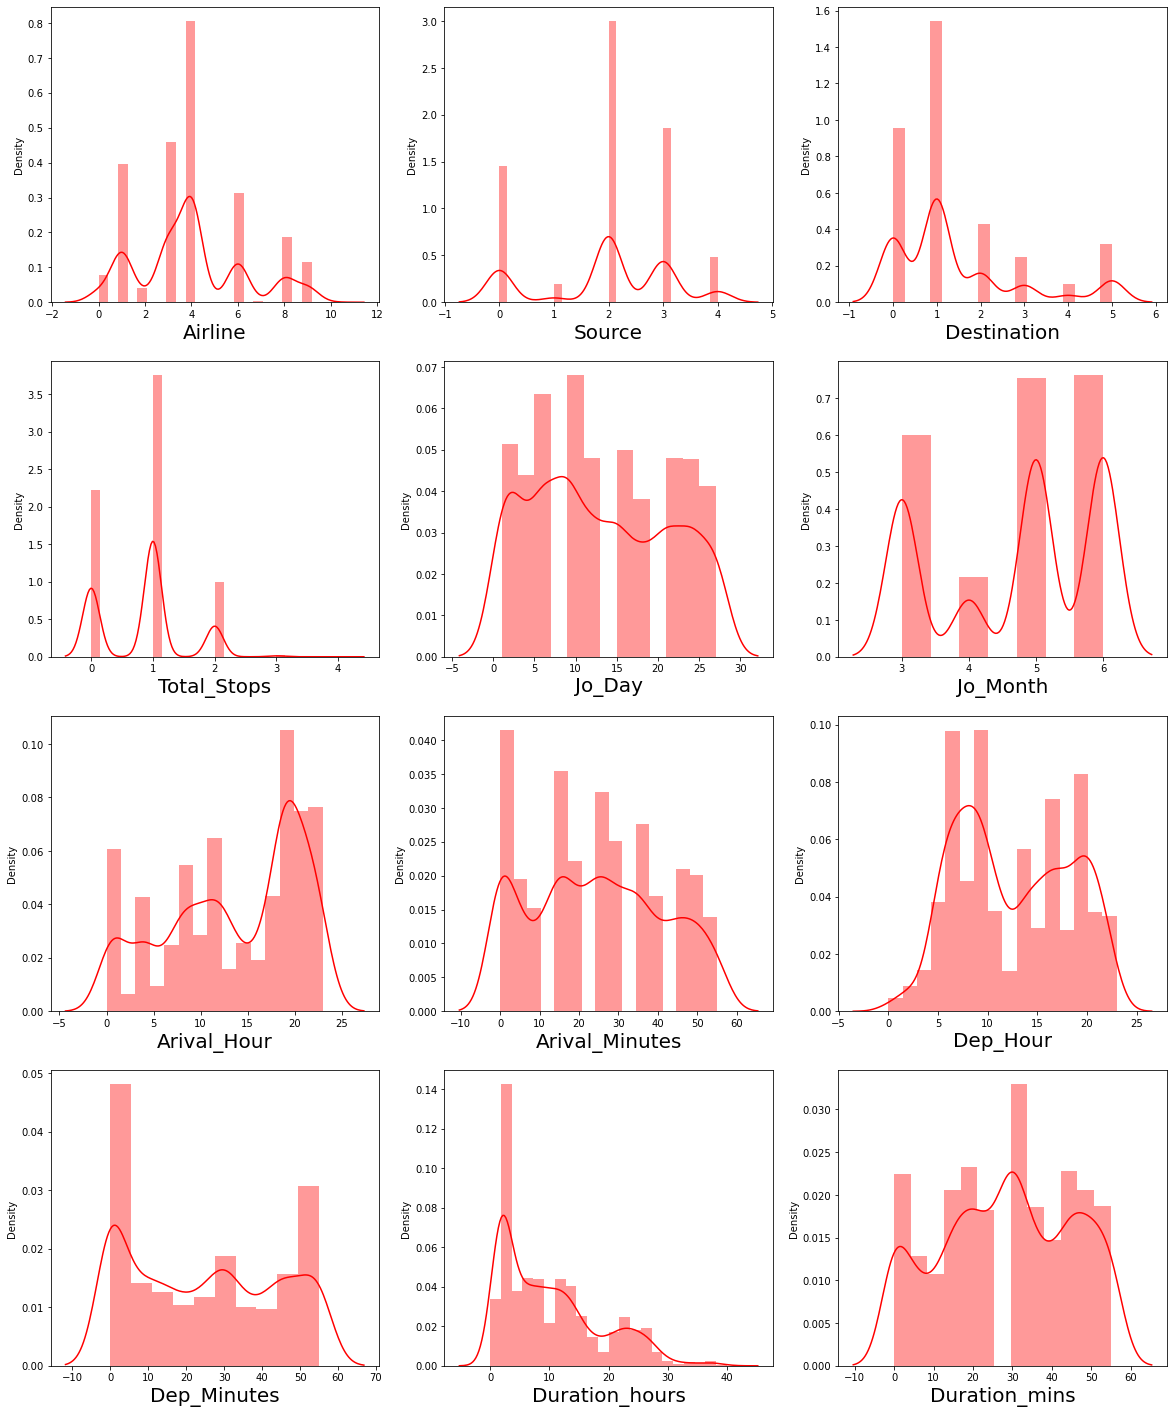

In [76]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df_test.columns:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_test[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

skewness present in duration hours

In [77]:
from sklearn.preprocessing import power_transform
df_test['Duration_hours']=power_transform(df_test,method='yeo-johnson')

df_test.head()

,Airline,Source,Destination,Total_Stops,Jo_Day,Jo_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
0,4,2,1,1,6,6,4,25,17,30,0.121699,55
1,3,3,0,1,12,5,10,20,6,20,-0.324499,0
2,4,2,1,1,21,5,19,0,19,15,0.121699,45
3,6,2,1,1,21,5,21,0,8,0,0.905569,0
4,0,0,2,0,24,6,2,45,23,55,-2.156375,50


# Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)
df_test.head()

,Airline,Source,Destination,Total_Stops,Jo_Day,Jo_Month,Arival_Hour,Arival_Minutes,Dep_Hour,Dep_Minutes,Duration_hours,Duration_mins
0,0.011908,0.032567,-0.294882,0.247853,-0.837333,1.094745,-1.361709,0.026340,0.773265,0.267704,0.121699,1.588723
1,-0.423779,0.877086,-0.976222,0.247853,-0.110877,0.240505,-0.509324,-0.271771,-1.161445,-0.256324,-0.324499,-1.695935
2,0.011908,0.032567,-0.294882,0.247853,0.978807,0.240505,0.769252,-1.464213,1.125030,-0.518338,0.121699,0.991512
3,0.883281,0.032567,-0.294882,0.247853,0.978807,0.240505,1.053380,-1.464213,-0.809679,-1.304381,0.905569,-1.695935
4,-1.730840,-1.656471,0.386458,-1.239823,1.342035,1.094745,-1.645837,1.218783,1.828561,1.577774,-2.156375,1.290118


HENCE TEST DATA EDA PROCESS IS COMPLETED AND MODEL BUILDING FOR TRAIN DATA IS COMPLETED AND FINAL RESULTS ARE GOOD WITH RANDOMFOREST REGRESSOR

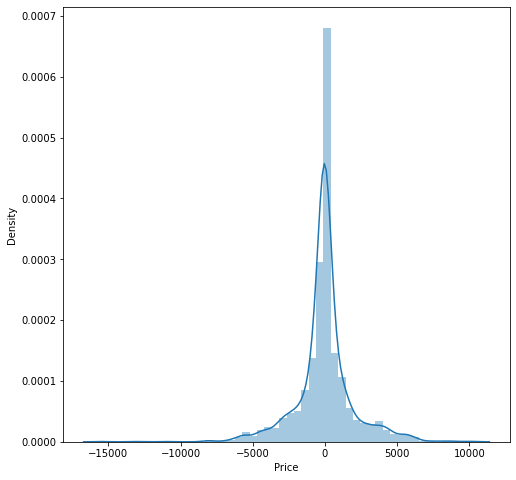

In [79]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-pred_ETR)
plt.show()

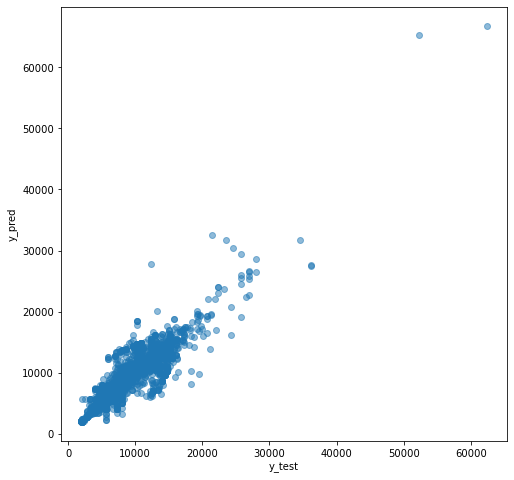

In [80]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, pred_ETR, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()